🚀 SYSTEM ONLINE: Training Standard ResNet18 Baseline
⚙️ Device: cuda:0

🥊 SCENARIO: ResNet18 (20%) (20% Data)
🏗️  Loading Standard ResNet18 (Pretrained)...


/home/akash_kishore/miniconda3/envs/hqcnn_env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/akash_kishore/miniconda3/envs/hqcnn_env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


   Ep 1/15 | Train: 78.30% | Val: 93.88% | Gap: -15.58%
   Ep 2/15 | Train: 95.81% | Val: 95.16% | Gap: 0.66%
   Ep 3/15 | Train: 97.31% | Val: 97.03% | Gap: 0.29%
   Ep 4/15 | Train: 98.20% | Val: 96.86% | Gap: 1.34%
   Ep 5/15 | Train: 98.39% | Val: 97.79% | Gap: 0.60%
   Ep 6/15 | Train: 98.98% | Val: 98.13% | Gap: 0.85%
   Ep 7/15 | Train: 99.08% | Val: 95.67% | Gap: 3.42%
   Ep 8/15 | Train: 99.40% | Val: 98.30% | Gap: 1.10%
   Ep 9/15 | Train: 99.25% | Val: 98.22% | Gap: 1.03%
   Ep 10/15 | Train: 98.75% | Val: 98.30% | Gap: 0.45%
   Ep 11/15 | Train: 99.19% | Val: 98.56% | Gap: 0.63%
   Ep 12/15 | Train: 99.19% | Val: 98.90% | Gap: 0.29%
   Ep 13/15 | Train: 99.22% | Val: 98.56% | Gap: 0.66%
   Ep 14/15 | Train: 99.04% | Val: 97.79% | Gap: 1.25%
   Ep 15/15 | Train: 99.43% | Val: 97.45% | Gap: 1.98%
✅ SAVED MODEL: resnet18_baseline_20.pth

🥊 SCENARIO: ResNet18 (100%) (100% Data)
🏗️  Loading Standard ResNet18 (Pretrained)...


/home/akash_kishore/miniconda3/envs/hqcnn_env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/akash_kishore/miniconda3/envs/hqcnn_env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


   Ep 1/15 | Train: 92.96% | Val: 7.34% | Gap: 85.62%
   Ep 2/15 | Train: 98.51% | Val: 7.33% | Gap: 91.18%
   Ep 3/15 | Train: 98.98% | Val: 7.68% | Gap: 91.30%
   Ep 4/15 | Train: 99.12% | Val: 7.68% | Gap: 91.44%
   Ep 5/15 | Train: 99.21% | Val: 7.24% | Gap: 91.97%
   Ep 6/15 | Train: 99.83% | Val: 7.46% | Gap: 92.37%
   Ep 7/15 | Train: 99.90% | Val: 7.50% | Gap: 92.41%
   Ep 8/15 | Train: 99.94% | Val: 7.46% | Gap: 92.48%
   Ep 9/15 | Train: 99.94% | Val: 7.48% | Gap: 92.46%
   Ep 10/15 | Train: 99.95% | Val: 7.53% | Gap: 92.42%
   Ep 11/15 | Train: 99.96% | Val: 7.50% | Gap: 92.46%
   Ep 12/15 | Train: 99.96% | Val: 7.48% | Gap: 92.48%
   Ep 13/15 | Train: 99.97% | Val: 7.53% | Gap: 92.44%
   Ep 14/15 | Train: 99.97% | Val: 7.53% | Gap: 92.44%
   Ep 15/15 | Train: 99.98% | Val: 7.48% | Gap: 92.50%
✅ SAVED MODEL: resnet18_baseline_100.pth

📊 GENERATING REPORT...


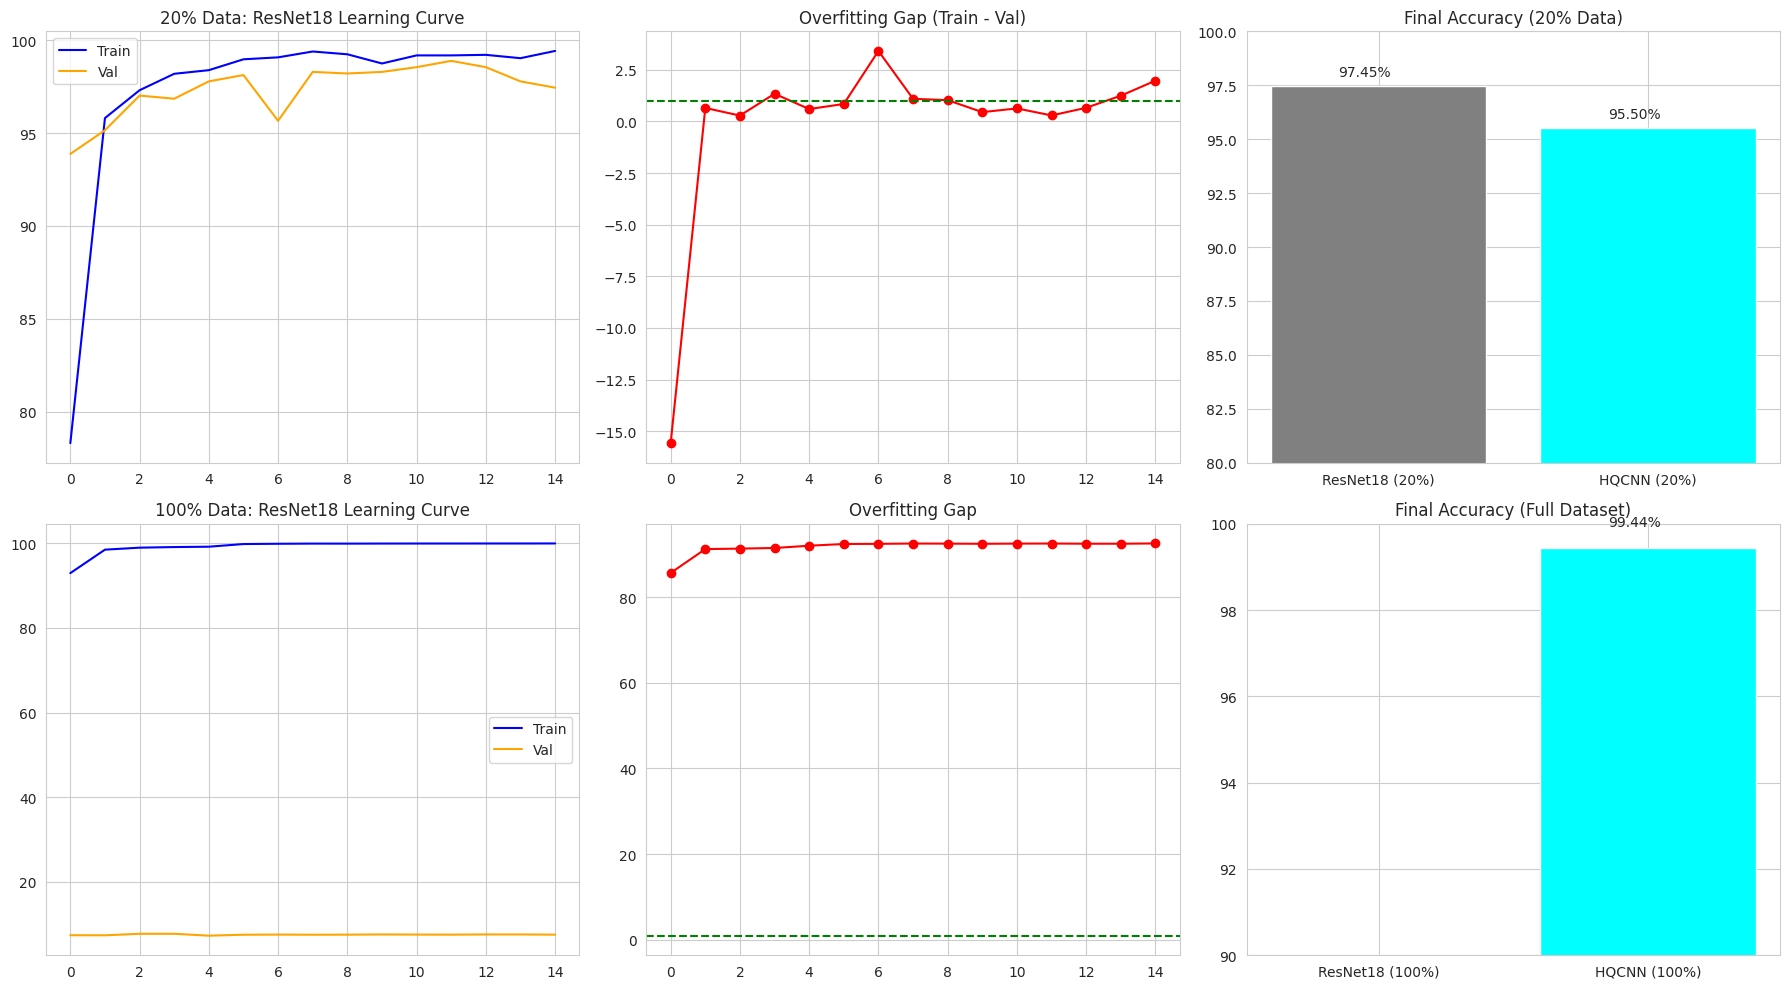

✅ Done. Models saved and plots generated.


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import models, transforms
from torch.utils.data import DataLoader, Subset
from PIL import Image
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CONFIGURATION ---
BATCH_SIZE = 32
EPOCHS = 15
LEARNING_RATE = 0.0004
# Adjusted path based on your previous WSL structure
DATA_DIR = '../data/GTSRB'  
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# HQCNN Baselines (From your notebook & specs)
HQCNN_ACC_20 = 95.50
HQCNN_ACC_100 = 99.44

print(f"🚀 SYSTEM ONLINE: Training Standard ResNet18 Baseline")
print(f"⚙️ Device: {DEVICE}")

# --- 2. DATA UTILITIES ---
class GTSRBDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, csv_file, transform=None):
        self.root_dir = root_dir
        self.df = pd.read_csv(csv_file)
        self.transform = transform
    def __len__(self): return len(self.df)
    def __getitem__(self, idx):
        img_rel_path = self.df.iloc[idx]['Path']
        img_path = os.path.join(self.root_dir, img_rel_path)
        try: image = Image.open(img_path).convert('RGB')
        except: return self.__getitem__((idx + 1) % len(self.df))
        label = int(self.df.iloc[idx]['ClassId'])
        if self.transform: image = self.transform(image)
        return image, label

def get_loaders(percent=1.0):
    train_csv = os.path.join(DATA_DIR, 'Train.csv')
    mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
    
    train_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2), 
        transforms.ToTensor(), transforms.Normalize(mean, std)
    ])
    val_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(), transforms.Normalize(mean, std)
    ])

    # Check if file exists
    if not os.path.exists(train_csv):
        print(f"❌ ERROR: Could not find {train_csv}")
        return None, None

    df = pd.read_csv(train_csv)
    n_samples = len(df)
    indices = list(range(n_samples))

    if percent < 1.0:
        n_samples = int(n_samples * percent)
        np.random.seed(42) # Fairness Seed
        np.random.shuffle(indices)
        indices = indices[:n_samples]
    
    split = int(0.85 * len(indices))
    train_idx, val_idx = indices[:split], indices[split:]

    train_set = Subset(GTSRBDataset(DATA_DIR, train_csv, transform=train_transform), train_idx)
    val_set = Subset(GTSRBDataset(DATA_DIR, train_csv, transform=val_transform), val_idx)
    
    return (DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=4),
            DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=4))

# --- 3. MODEL BUILDER: STANDARD RESNET18 ---
def build_standard_resnet18():
    print("🏗️  Loading Standard ResNet18 (Pretrained)...")
    # This loads the official PyTorch ResNet18
    model = models.resnet18(pretrained=True)
    
    # Freeze earlier layers to match HQCNN training style
    for param in model.parameters():
        param.requires_grad = False
    
    # Unfreeze Layer 4 (Top feature extractor)
    for param in model.layer4.parameters():
        param.requires_grad = True
        
    # Replace the final Fully Connected layer for 43 Classes
    # (ResNet18 default is 1000 classes, we need 43)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 43) 
    
    return model.to(DEVICE)

# --- 4. TRAINING ENGINE (With Saving) ---
def train_scenario(percent, scenario_name, save_filename):
    print(f"\n🥊 SCENARIO: {scenario_name} ({int(percent*100)}% Data)")
    train_loader, val_loader = get_loaders(percent)
    
    if train_loader is None: return None # Stop if data not found

    model = build_standard_resnet18()
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=LEARNING_RATE)
    scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)
    
    history = {'train_acc': [], 'val_acc': [], 'gap': []}
    
    start_time = time.time()
    
    for epoch in range(EPOCHS):
        # TRAIN
        model.train()
        correct = 0; total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        train_acc = 100 * correct / total
            
        # VAL
        model.eval()
        v_correct = 0; v_total = 0; v_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                v_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                v_total += labels.size(0)
                v_correct += (predicted == labels).sum().item()
        
        val_acc = 100 * v_correct / v_total
        avg_v_loss = v_loss / len(val_loader)
        
        # METRICS
        gap = train_acc - val_acc 
        scheduler.step(avg_v_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)
        history['gap'].append(gap)
        
        print(f"   Ep {epoch+1}/{EPOCHS} | Train: {train_acc:.2f}% | Val: {val_acc:.2f}% | Gap: {gap:.2f}%")
        
    # --- SAVE THE MODEL ---
    torch.save(model.state_dict(), save_filename)
    print(f"✅ SAVED MODEL: {save_filename}")
    
    return history

# --- 5. EXECUTION ---
# Train 20% Model
hist_20 = train_scenario(0.20, "ResNet18 (20%)", "resnet18_baseline_20.pth")

# Train 100% Model
hist_100 = train_scenario(1.00, "ResNet18 (100%)", "resnet18_baseline_100.pth")

# --- 6. PLOTTING ---
if hist_20 and hist_100:
    print("\n📊 GENERATING REPORT...")
    sns.set_style("whitegrid")
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))

    # ROW 1: 20% Data
    axs[0, 0].plot(hist_20['train_acc'], label='Train', color='blue')
    axs[0, 0].plot(hist_20['val_acc'], label='Val', color='orange')
    axs[0, 0].set_title("20% Data: ResNet18 Learning Curve")
    axs[0, 0].legend()

    axs[0, 1].plot(hist_20['gap'], color='red', marker='o')
    axs[0, 1].axhline(y=1.0, color='green', linestyle='--')
    axs[0, 1].set_title("Overfitting Gap (Train - Val)")

    axs[0, 2].bar(['ResNet18 (20%)', 'HQCNN (20%)'], [hist_20['val_acc'][-1], HQCNN_ACC_20], color=['gray', 'cyan'])
    axs[0, 2].set_title("Final Accuracy (20% Data)")
    axs[0, 2].set_ylim(80, 100)
    for p in axs[0, 2].patches:
        axs[0, 2].annotate(f'{p.get_height():.2f}%', (p.get_x()+0.25, p.get_height()+0.5))

    # ROW 2: 100% Data
    axs[1, 0].plot(hist_100['train_acc'], label='Train', color='blue')
    axs[1, 0].plot(hist_100['val_acc'], label='Val', color='orange')
    axs[1, 0].set_title("100% Data: ResNet18 Learning Curve")
    axs[1, 0].legend()

    axs[1, 1].plot(hist_100['gap'], color='red', marker='o')
    axs[1, 1].axhline(y=1.0, color='green', linestyle='--')
    axs[1, 1].set_title("Overfitting Gap")

    axs[1, 2].bar(['ResNet18 (100%)', 'HQCNN (100%)'], [hist_100['val_acc'][-1], HQCNN_ACC_100], color=['gray', 'cyan'])
    axs[1, 2].set_title("Final Accuracy (Full Dataset)")
    axs[1, 2].set_ylim(90, 100)
    for p in axs[1, 2].patches:
        axs[1, 2].annotate(f'{p.get_height():.2f}%', (p.get_x()+0.25, p.get_height()+0.5))

    plt.tight_layout()
    plt.savefig('resnet18_vs_hqcnn_analysis.png')
    plt.show()
    print("✅ Done. Models saved and plots generated.")

In [6]:
import sys
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import time
import copy

# --- PATH FIX ---
# This tells Python to look in the folder 'one level up' and then into 'src'
# structure assumed:
#   project/
#      ├── notebooks/  <-- You are here
#      ├── src/        <-- Where data_loader.py is
#      └── data/       <-- Where your images are
sys.path.append(os.path.abspath('../src'))

# Now we can import from your src folder
from data_loader import get_data_loaders

In [9]:
# --- CONFIGURATION ---
DATA_DIR = '../data/GTSRB'   # Relative path to data from the notebooks folder
BATCH_SIZE = 64        # Good standard for ResNet
NUM_CLASSES = 43       # GTSRB classes
NUM_EPOCHS = 20        # Sufficient for convergence
LEARNING_RATE = 0.01

def train_resnet_baseline():
    # 1. Setup Device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"🚀 Training Configuration: ResNet18 Baseline | Device: {device}")

    # 2. Get Data Loaders (100% Data)
    # Note: We use 1.0 to train on ALL data for the fair baseline comparison
    print(f"Loading 100% of Dataset from {DATA_DIR}...")
    try:
        train_loader, val_loader = get_data_loaders(DATA_DIR, batch_size=BATCH_SIZE, percent=1.0)
    except FileNotFoundError:
        print("❌ Error: Could not find data. Check if '../data' is the correct path relative to this notebook.")
        return

    # 3. Initialize Model (From Scratch)
    # We do NOT use pretrained weights to ensure a fair "Architecture vs Architecture" comparison
    model = models.resnet18(weights=None)
    
    # Modify the final layer
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, NUM_CLASSES)
    model = model.to(device)

    # 4. Define Loss, Optimizer, Scheduler
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9, weight_decay=5e-4)
    
    # Scheduler: Reduce LR if validation loss stops improving
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

    # 5. Training Loop
    best_acc = 0.0
    best_model_wts = copy.deepcopy(model.state_dict())
    
    start_time = time.time()
    
    print("-" * 60)
    print(f"Starting Training for {NUM_EPOCHS} Epochs...")
    print("-" * 60)

    for epoch in range(NUM_EPOCHS):
        epoch_start = time.time()

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_loader
            else:
                model.eval()
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            # Print concise epoch stats
            if phase == 'val':
                print(f"Epoch {epoch+1}/{NUM_EPOCHS} | {phase.upper()} | Loss: {epoch_loss:.4f} | Acc: {epoch_acc:.4f}")
                
                # Check for best model
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                    # Save inside the notebooks folder (or change path if you prefer)
                    torch.save(model.state_dict(), 'resnet18_baseline_best.pth')
                    print(f"   --> 💾 Saved New Best Model! (Acc: {best_acc:.4f})")
                
                # Step Scheduler
                scheduler.step(epoch_loss)

    time_elapsed = time.time() - start_time
    print("-" * 60)
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'🏆 Best Validation Accuracy: {best_acc:.4f}')
    print("-" * 60)

In [10]:
# Execute the training
train_resnet_baseline()

🚀 Training Configuration: ResNet18 Baseline | Device: cuda
Loading 100% of Dataset from ../data/GTSRB...
✅ DATA READY: 33327 Train | 5882 Val


/home/akash_kishore/miniconda3/envs/hqcnn_env/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


------------------------------------------------------------
Starting Training for 20 Epochs...
------------------------------------------------------------
Epoch 1/20 | VAL | Loss: 0.5487 | Acc: 0.8278
   --> 💾 Saved New Best Model! (Acc: 0.8278)
Epoch 2/20 | VAL | Loss: 0.3402 | Acc: 0.9121
   --> 💾 Saved New Best Model! (Acc: 0.9121)
Epoch 3/20 | VAL | Loss: 0.0682 | Acc: 0.9803
   --> 💾 Saved New Best Model! (Acc: 0.9803)
Epoch 4/20 | VAL | Loss: 0.0126 | Acc: 0.9974
   --> 💾 Saved New Best Model! (Acc: 0.9974)
Epoch 5/20 | VAL | Loss: 0.0253 | Acc: 0.9940
Epoch 6/20 | VAL | Loss: 0.0197 | Acc: 0.9961
Epoch 7/20 | VAL | Loss: 0.0049 | Acc: 0.9991
   --> 💾 Saved New Best Model! (Acc: 0.9991)
Epoch 8/20 | VAL | Loss: 0.0033 | Acc: 0.9993
   --> 💾 Saved New Best Model! (Acc: 0.9993)
Epoch 9/20 | VAL | Loss: 0.0062 | Acc: 0.9988
Epoch 10/20 | VAL | Loss: 0.0056 | Acc: 0.9993
Epoch 11/20 | VAL | Loss: 0.0038 | Acc: 0.9993
Epoch 12/20 | VAL | Loss: 0.0338 | Acc: 0.9934
Epoch 13/20 | VAL 